# Helpful Resources
* Example Tutorial: https://towardsdatascience.com/walkthrough-mapping-basics-with-bokeh-and-geopandas-in-python-43f40aa5b7e9
* Bokeh Visualization Documentation: https://docs.bokeh.org/en/latest/docs/user_guide/geo.html
* Bokeh Documentation for Jupyter: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html
* Bokeh Palettes Documentation: https://docs.bokeh.org/en/latest/docs/reference/palettes.html

In [2]:
# imports
import geopandas as gpd
import pandas as pd
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
from bokeh.

In [3]:
# set pandas to display all columns in dataframe
pd.set_option("display.max_columns", None)

In [4]:
# read in combined dataset
combined_df = pd.read_csv("https://raw.githubusercontent.com/ehuang13/w210-presidential-election/master/data/combined_jun13.csv")

In [5]:
combined_df.head()

,Unnamed: 0,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,DEM_CANDIDATE,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,WINNING_CANDIDATE,WINNING_PARTY,WINNING_PARTY_BINARY,HOUSE_WINNING_BINARY,SENATE_WINNING_BINARY,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%
0,0,0,20121001,2012,1,1,Alabama,Autauga County,1001.0,Mitt Romney,Barack Obama,17379.0,6363.0,23932.0,Mitt Romney,republican,1,0.0,NaN,6.9,33766.0,296,201,5152,4591,615,693,131,119,17.0,28,28084,26670,54754,22052,21357,16046,8188,7858,13845,6759,7086,15464,7577,7887,9399,4146,5253,0.005406,0.003671,0.094094,0.083848,0.011232,0.012657,0.002393,0.002173,0.000310,0.000511,0.402747,0.390054,0.512912,0.487088,0.293056,0.252858,0.282427,0.171659
1,1,1,20121003,2012,1,3,Alabama,Baldwin County,1003.0,Mitt Romney,Barack Obama,66016.0,18424.0,85338.0,Mitt Romney,republican,1,0.0,NaN,7.5,64282.0,833,551,8913,8421,3614,4450,670,660,55.0,73,93493,89618,183111,81752,78718,46410,23528,22882,42149,21095,21054,51691,25005,26686,42861,19990,22871,0.004549,0.003009,0.048675,0.045988,0.019737,0.024302,0.003659,0.003604,0.000300,0.000399,0.446461,0.429892,0.510581,0.489419,0.253453,0.230183,0.282293,0.234071
2,2,2,20121005,2012,1,5,Alabama,Barbour County,1005.0,Mitt Romney,Barack Obama,5550.0,5912.0,11509.0,Barack Obama,democrat,0,0.0,NaN,11.5,64168.0,59,59,6111,6786,599,747,73,88,17.0,29,12826,14504,27330,6482,7414,6620,3373,3247,7401,4461,2940,7618,4124,3494,5691,2546,3145,0.002159,0.002159,0.223600,0.248299,0.021917,0.027333,0.002671,0.003220,0.000622,0.001061,0.237175,0.271277,0.469301,0.530699,0.242225,0.270801,0.278741,0.208233
3,3,3,20121007,2012,1,7,Alabama,Bibb County,1007.0,Mitt Romney,Barack Obama,6132.0,2202.0,8420.0,Mitt Romney,republican,1,0.0,NaN,8.5,69624.0,10,12,1972,3069,110,300,32,36,5.0,26,10608,12264,22872,8491,9034,5691,3004,2687,6475,3809,2666,6426,3505,2921,4280,1946,2334,0.000437,0.000525,0.086219,0.134182,0.004809,0.013116,0.001399,0.001574,0.000219,0.001137,0.371240,0.394981,0.463799,0.536201,0.248820,0.283097,0.280955,0.187128
4,4,4,20121009,2012,1,9,Alabama,Blount County,1009.0,Mitt Romney,Barack Obama,20757.0,2970.0,24006.0,Mitt Romney,republican,1,0.0,NaN,6.9,60178.0,82,48,390,424,2081,2582,173,177,25.0,36,28988,28385,57373,27995,27415,15550,7963,7587,13866,7017,6849,15869,7941,7928,12088,5464,6624,0.001429,0.000837,0.006798,0.007390,0.036271,0.045004,0.003015,0.003085,0.000436,0.000627,0.487947,0.477838,0.505255,0.494745,0.271033,0.241682,0.276594,0.210691


# Plotting States With Bokeh

In [6]:
# read in states shapefile from US Census Bureau
states_usa = gpd.read_file("bokeh/cb_2018_us_state_20m.shp")
print("States shapefile dimension: {}".format(states_usa.shape))
states_usa.head()

States shapefile dimension: (52, 10)


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


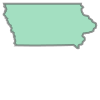

In [11]:
# try to visualizae Maryland
states_usa.iloc[1]["geometry"]

In [12]:
# merge combined dataset with state shapefile
merged_states = states_usa.merge(combined_df, left_on="NAME", right_on="STATE")
print("Merged States Dataframe Dimensions: {}".format(merged_states.shape))
merged_states.head()

Merged States Dataframe Dimensions: (15437, 76)


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Unnamed: 0,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,DEM_CANDIDATE,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,WINNING_CANDIDATE,WINNING_PARTY,WINNING_PARTY_BINARY,HOUSE_WINNING_BINARY,SENATE_WINNING_BINARY,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",1456,1825,201224001,2012,24,1,Maryland,Allegany County,24001.0,Mitt Romney,Barack Obama,19230.0,9805.0,29850.0,Mitt Romney,republican,1,0.0,0.0,8.9,73966.0,322,285,1314,4674,358,733,55,59,18.0,17,36187,38779,74966,33890,33188,16637,8547,8090,19968,11526,8442,20288,10762,9526,18073,7944,10129,0.004295,0.003802,0.017528,0.062348,0.004775,0.009778,0.000734,0.000787,0.000240,0.000227,0.452072,0.442707,0.482712,0.517288,0.221927,0.266361,0.270629,0.241083
1,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",1457,1826,201224003,2012,24,3,Maryland,Anne Arundel County,24003.0,Mitt Romney,Barack Obama,126832.0,126635.0,260155.0,Mitt Romney,republican,1,0.0,0.0,6.0,58706.0,10182,8655,43868,41581,15763,17563,1019,1091,310.0,306,272630,266647,539277,210063,208052,138566,71275,67291,143548,73351,70197,162060,78964,83096,95103,43057,52046,0.018881,0.016049,0.081346,0.077105,0.029230,0.032568,0.001890,0.002023,0.000575,0.000567,0.389527,0.385798,0.505547,0.494453,0.256948,0.266186,0.300513,0.176353
2,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",1458,1827,201224005,2012,24,5,Maryland,Baltimore County,24005.0,Mitt Romney,Barack Obama,154908.0,220322.0,384782.0,Barack Obama,democrat,0,0.0,0.0,7.4,51722.0,21151,20318,117382,96277,16374,17780,1629,1603,256.0,269,425494,381066,806560,276347,254542,201034,101951,99083,211432,101371,110061,229077,107665,121412,165017,70079,94938,0.026224,0.025191,0.145534,0.119367,0.020301,0.022044,0.002020,0.001987,0.000317,0.000334,0.342624,0.315590,0.527542,0.472458,0.249249,0.262140,0.284017,0.204594
3,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",1459,1828,201224009,2012,24,9,Maryland,Calvert County,24009.0,Mitt Romney,Barack Obama,23952.0,20529.0,45518.0,Mitt Romney,republican,1,0.0,0.0,6.3,44239.0,817,484,6241,5781,1262,1196,170,180,34.0,21,45151,43837,88988,36748,36226,25451,13043,12408,18846,9291,9555,30056,14693,15363,14635,6810,7825,0.009181,0.005439,0.070133,0.064964,0.014182,0.013440,0.001910,0.002023,0.000382,0.000236,0.412955,0.407089,0.507383,0.492617,0.286005,0.211781,0.337753,0.164460
4,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",1460,1829,201224011,2012,24,11,Maryland,Caroline County,24011.0,Mitt Romney,Barack Obama,8098.0,4970.0,13357.0,Mitt Romney,republican,1,0.0,0.0,7.7,75012.0,114,90,2512,2126,776,1037,93,160,36.0,68,16946,16108,33054,13885,13347,9192,4657,4535,7901,3914,3987,9631,4687,4944,6330,2850,3480,0.003449,0.002723,0.075997,0.064319,0.023477,0.031373,0.002814,0.004841,0.001089,0.002057,0.420070,0.403794,0.512676,0.487324,0.278090,0.239033,0.291372,0.191505


In [17]:
merged_states[merged_states['FIPS'] == 1001.0]

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Unnamed: 0,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,DEM_CANDIDATE,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,WINNING_CANDIDATE,WINNING_PARTY,WINNING_PARTY_BINARY,HOUSE_WINNING_BINARY,SENATE_WINNING_BINARY,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%
2065,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933...",0,0,20121001,2012,1,1,Alabama,Autauga County,1001.0,Mitt Romney,Barack Obama,17379.0,6363.0,23932.0,Mitt Romney,republican,1,0.0,NaN,6.9,33766.0,296,201,5152,4591,615,693,131,119,17.0,28,28084,26670,54754,22052,21357,16046,8188,7858,13845,6759,7086,15464,7577,7887,9399,4146,5253,0.005406,0.003671,0.094094,0.083848,0.011232,0.012657,0.002393,0.002173,0.000310,0.000511,0.402747,0.390054,0.512912,0.487088,0.293056,0.252858,0.282427,0.171659
2132,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933...",290,316,20161001,2016,1,1,Alabama,Autauga County,1001.0,Donald Trump,Hillary Clinton,18172.0,5936.0,24973.0,Donald Trump,republican,1,1.0,1.0,5.1,36564.0,337,237,5298,4807,697,733,153,125,18.0,32,28092,26784,54876,21841,21085,14950,7687,7263,13760,6775,6985,15715,7623,8092,10451,4699,5752,0.006141,0.004319,0.096545,0.087597,0.012701,0.013357,0.002788,0.002278,0.000328,0.000583,0.398006,0.384230,0.511918,0.488082,0.272432,0.250747,0.286373,0.190448
2199,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933...",6231,9429,20001001,2000,1,1,Alabama,Autauga County,1001.0,George W. Bush,Al Gore,11993.0,4942.0,17208.0,George W. Bush,republican,1,1.0,NaN,4.0,24447.0,146,63,4040,3464,278,333,104,94,9.0,4,22499,21252,43751,18019,17456,13653,7013,6640,12089,5871,6218,11617,5611,6006,6392,2757,3635,0.003337,0.001440,0.092341,0.079175,0.006354,0.007611,0.002377,0.002149,0.000206,0.000091,0.411853,0.398985,0.514251,0.485749,0.312061,0.276314,0.265525,0.146100
2266,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933...",9300,12572,20041001,2004,1,1,Alabama,Autauga County,1001.0,George W. Bush,John Kerry,15196.0,4758.0,20081.0,George W. Bush,republican,1,1.0,1.0,4.8,27272.0,186,108,4284,3805,367,425,115,110,9.0,6,24040,22760,46800,19207,18509,14472,7373,7099,12253,5965,6288,12933,6309,6624,7142,3113,4029,0.003974,0.002308,0.091538,0.081303,0.007842,0.009081,0.002457,0.002350,0.000192,0.000128,0.410406,0.395491,0.513675,0.486325,0.309231,0.261816,0.276346,0.152607
2333,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933...",12370,15715,20081001,2008,1,1,Alabama,Autauga County,1001.0,John McCain,Barack Obama,17403.0,6093.0,23641.0,John McCain,republican,1,1.0,1.0,5.1,30792.0,253,151,4888,4402,547,616,124,109,15.0,23,26937,25468,52405,21313,20471,16187,8222,7965,13315,6484,6831,14521,7110,7411,8382,3652,4730,0.004828,0.002881,0.093274,0.084000,0.010438,0.011755,0.002366,0.002080,0.000286,0.000439,0.406698,0.390631,0.514016,0.485984,0.308883,0.254079,0.277092,0.159947


In [18]:
# drop Alaska and Hawaii
merged_states = merged_states.loc[~merged_states["NAME"].isin(["Alaska", "Hawaii"])]

In [19]:
# input GeoJSON source that contains features for plotting
geosource_states = GeoJSONDataSource(geojson = merged_states.to_json())

In [20]:
# plot states map

# create figure object.
plot = figure(title = 'Test Bokeh Map', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, box_zoom, reset")
plot.xgrid.grid_line_color = None
plot.ygrid.grid_line_color = None

# add patch renderer to figure.
states = plot.patches('xs','ys', source = geosource_states,
                   fill_color = None,
                   line_color = "gray", 
                   line_width = 0.25, 
                   fill_alpha = 1)
# create hover tool
plot.add_tools(HoverTool(renderers = [state],
                      tooltips = [('State','@NAME'),
                                ('Votes','@COUNTY_TOTALVOTES')]))

# generates a map on separate tab in browser
show(plot)

NameError: name 'state' is not defined

# Plotting Counties With Bokeh

In [21]:
# read in counties shapefile from US Census Bureau
counties_usa = gpd.read_file("bokeh/cb_2018_us_county_20m.shp")
print("Counties Shapefile Dimensions: {}".format(counties_usa.shape))
counties_usa.head()

Counties Shapefile Dimensions: (3220, 10)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,37,017,01026336,0500000US37017,37017,Bladen,06,2265887723,33010866,"POLYGON ((-78.90200 34.83527, -78.79960 34.850..."
1,37,167,01025844,0500000US37167,37167,Stanly,06,1023370459,25242751,"POLYGON ((-80.49737 35.20210, -80.29542 35.502..."
2,39,153,01074088,0500000US39153,39153,Summit,06,1069181981,18958267,"POLYGON ((-81.68699 41.13596, -81.68495 41.277..."
3,42,113,01213687,0500000US42113,42113,Sullivan,06,1165338428,6617028,"POLYGON ((-76.81373 41.59003, -76.22014 41.541..."
4,48,459,01384015,0500000US48459,48459,Upshur,06,1509910100,24878888,"POLYGON ((-95.15274 32.66095, -95.15211 32.902..."


In [22]:
# cast GEOID data type to float64 instead of str for merging
counties_usa["GEOID"] = counties_usa["GEOID"].astype("float64")

In [23]:
# merge counties shapefile with combined_df
merged_counties = counties_usa.merge(combined_df, left_on="GEOID", right_on="FIPS")
print("Merged Counties Dataframe Dimensions: {}".format(merged_counties.shape))
merged_counties.head()

Merged Counties Dataframe Dimensions: (15437, 76)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Unnamed: 0,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,DEM_CANDIDATE,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,WINNING_CANDIDATE,WINNING_PARTY,WINNING_PARTY_BINARY,HOUSE_WINNING_BINARY,SENATE_WINNING_BINARY,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%
0,37,017,01026336,0500000US37017,37017.0,Bladen,06,2265887723,33010866,"POLYGON ((-78.90200 34.83527, -78.79960 34.850...",2161,2530,201237017,2012,37,17,North Carolina,Bladen County,37017.0,Mitt Romney,Barack Obama,7748.0,8062.0,15957.0,Barack Obama,democrat,0,0.0,NaN,12.7,32450.0,42,35,6703,5699,1123,1402,445,451,3.0,5,18294,16898,35192,10831,10502,8938,4544,4394,8078,3964,4114,10209,4904,5305,7967,3486,4481,0.001193,0.000995,0.190469,0.161940,0.031911,0.039839,0.012645,0.012815,0.000085,0.000142,0.307769,0.298420,0.519834,0.480166,0.253978,0.229541,0.290094,0.226387
1,37,017,01026336,0500000US37017,37017.0,Bladen,06,2265887723,33010866,"POLYGON ((-78.90200 34.83527, -78.79960 34.850...",4985,5356,201637017,2016,37,17,North Carolina,Bladen County,37017.0,Donald Trump,Hillary Clinton,8550.0,7058.0,15897.0,Donald Trump,republican,1,0.0,1.0,6.9,35168.0,56,53,6511,5480,1085,1383,493,468,6.0,6,17925,16461,34386,10572,10205,8163,4173,3990,7587,3715,3872,9502,4490,5012,9134,4083,5051,0.001629,0.001541,0.189350,0.159367,0.031554,0.040220,0.014337,0.013610,0.000174,0.000174,0.307451,0.296778,0.521288,0.478712,0.237393,0.220642,0.276333,0.265631
2,37,017,01026336,0500000US37017,37017.0,Bladen,06,2265887723,33010866,"POLYGON ((-78.90200 34.83527, -78.79960 34.850...",7835,11104,200037017,2000,37,17,North Carolina,Bladen County,37017.0,George W. Bush,Al Gore,4977.0,5889.0,10908.0,Al Gore,democrat,0,0.0,NaN,6.0,22852.0,20,18,6623,5659,430,764,356,316,9.0,8,16749,15503,32252,9643,9425,8777,4524,4253,8312,4119,4193,9014,4349,4665,6149,2511,3638,0.000620,0.000558,0.205352,0.175462,0.013333,0.023688,0.011038,0.009798,0.000279,0.000248,0.298989,0.292230,0.519317,0.480683,0.272138,0.257720,0.279487,0.190655
3,37,017,01026336,0500000US37017,37017.0,Bladen,06,2265887723,33010866,"POLYGON ((-78.90200 34.83527, -78.79960 34.850...",10904,14247,200437017,2004,37,17,North Carolina,Bladen County,37017.0,George W. Bush,John Kerry,6174.0,6109.0,12313.0,George W. Bush,republican,1,0.0,1.0,7.1,24844.0,24,19,6653,5644,719,922,403,381,9.0,6,17248,15881,33129,10009,9724,9193,4702,4491,8248,4010,4238,9363,4552,4811,6325,2617,3708,0.000724,0.000574,0.200821,0.170364,0.021703,0.027831,0.012165,0.011500,0.000272,0.000181,0.302122,0.293519,0.520631,0.479369,0.277491,0.248966,0.282622,0.190920
4,37,017,01026336,0500000US37017,37017.0,Bladen,06,2265887723,33010866,"POLYGON ((-78.90200 34.83527, -78.79960 34.850...",13974,17390,200837017,2008,37,17,North Carolina,Bladen County,37017.0,John McCain,Barack Obama,7532.0,7853.0,15480.0,Barack Obama,democrat,0,0.0,0.0,7.7,28876.0,36,31,6760,5620,870,1181,415,398,3.0,6,17900,16385,34285,10472,10154,9197,4676,4521,7945,3825,4120,9999,4796,5203,7144,3088,4056,0.001050,0.000904,0.197171,0.163920,0.025376,0.034447,0.012104,0.011609,0.000088,0.000175,0.305440,0.296165,0.522094,0.477906,0.268251,0.231734,0.291644,0.208371


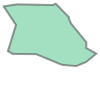

In [24]:
# try to visualize Bladen county
merged_counties.iloc[0]["geometry"]

In [25]:
# drop Alaska and Hawaii
merged_counties = merged_counties.loc[~merged_counties["STATE"].isin(["Alaska", "Hawaii"])]

In [26]:
# input GeoJSON source that contains features for plotting
geosource_counties = GeoJSONDataSource(geojson = merged_counties.to_json())

In [28]:
# plot county map

# create figure object
plot = figure(title = 'Test Bokeh Map', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, reset")
plot.xgrid.grid_line_color = None
plot.ygrid.grid_line_color = None

# add patch renderer to figure.
county = plot.patches('xs','ys', source = geosource_counties,
                   fill_color = None,
                   line_color = "gray", 
                   line_width = 0.25, 
                   fill_alpha = 1)
# create hover tool
plot.add_tools(HoverTool(renderers = [county],
                      tooltips = [('County','@NAME'),
                                ('Votes','@COUNTY_TOTALVOTES')]))

# generates a map on separate tab in browser
show(plot)

# Plot Counties and County Votes With Color Slider Bar for Election Year 2000

In [57]:
# create 2000 election year data frame
yr2000 = merged_counties["YEAR"] == 2008
merged_2000 = merged_counties[yr2000]

# input GeoJSON source that contains features for plotting
geosource_2000 = GeoJSONDataSource(geojson = merged_2000.to_json())

In [58]:
# define color palettes
palette = brewer["GnBu"][8]

# use reverse order so higher values are darker
palette = palette[::-1]

In [59]:
# find range for color bar by total # of votes cast by counties
# data_min = merged_2000["COUNTY_TOTALVOTES"].min()
# data_max = merged_2000["COUNTY_TOTALVOTES"].max()
# print("Min & Max of Total Votes: {} - {}".format(data_min, data_max))
merged_2000["WINNING_PARTY_BINARY"].describe()

count    3063.000000
mean        0.717597
std         0.450242
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: WINNING_PARTY_BINARY, dtype: float64

In [66]:
# instantiate LineraColorMapper and manually set low/high end for colorbar
color_mapper = LinearColorMapper(palette = Seq('Category10'), low = 0,  high = 1)

NameError: name 'Seq' is not defined

In [61]:
tick_labels = {'0': 'Democrat', '1': 'Republican'}

In [62]:
# create color slider bar at the bottom of chart
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 1,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = "horizontal",
                     major_label_overrides = tick_labels)

In [63]:
# create figure object
plot = figure(title = "Total # of Votes Cast by County in 2000 Presidential Election", 
           plot_height = 600, plot_width = 950, 
           toolbar_location = "below",
           tools = "pan, wheel_zoom, reset")

plot.xgrid.grid_line_color = None
plot.ygrid.grid_line_color = None

# add patch renderer to figure
counties = plot.patches("xs","ys", source = geosource_2000,
                   fill_color = {"field": "WINNING_PARTY_BINARY",
                                 "transform": color_mapper},
                   line_color = "gray", 
                   line_width = 0.25, 
                   fill_alpha = 1)
# create hover tool
plot.add_tools(HoverTool(renderers = [counties],
                      tooltips = [("County","@NAME"),
                               ("Votes", "@WINNING_PARTY_BINARY")]))
# specify colorbar layout
plot.add_layout(color_bar, "below")

show(plot)

# TESTING CODE BELOW

In [ ]:
merged_2000["STATE"].unique()